## Import Libraries

In [7]:
from os import path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import sys
sys.path.append('../modules')
from plotter import simple_line_plot

## Read txt file into Pandas Dataframe

In [8]:
## location and name of txt file
filename = '../sample-data/KSBA.csv'
## reads file into a pandas dataframe - sets the header as line 6 (using 0 index)
## skips row 7 as that is unit information
## creates a datetime column from 'Date_Time' column (extremely useful when dealing with time series)
df = pd.read_csv(filename, header=6, skiprows=[7], sep=',', engine='python',
                      parse_dates=['Date_Time'])

df.head()

,Station_ID,Date_Time,altimeter_set_1,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,sea_level_pressure_set_1,...,ceiling_set_1,pressure_change_code_set_1,air_temp_high_24_hour_set_1,air_temp_low_24_hour_set_1,peak_wind_direction_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,pressure_set_1d,sea_level_pressure_set_1d
0,KSBA,2019-03-30 23:00:00+00:00,101659.34,22.0,NaN,26.74,5.14,250.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.97,NaN,WSW,101623.42,101659.28
1,KSBA,2019-03-30 23:05:00+00:00,101659.34,22.0,NaN,26.74,4.12,260.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.97,NaN,W,101623.42,101659.28
2,KSBA,2019-03-30 23:10:00+00:00,101659.34,22.0,NaN,28.72,4.63,260.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.97,NaN,W,101623.42,101659.28
3,KSBA,2019-03-30 23:15:00+00:00,101625.47,22.0,NaN,26.74,4.63,260.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.97,NaN,W,101589.56,101625.40
4,KSBA,2019-03-30 23:20:00+00:00,101625.47,22.0,NaN,28.72,4.12,270.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.97,NaN,W,101589.56,101625.40


#### Plot time series

Plot a simple time series plot with different [marker](https://matplotlib.org/3.2.1/api/markers_api.html#module-matplotlib.markers) and [line](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) styles. 

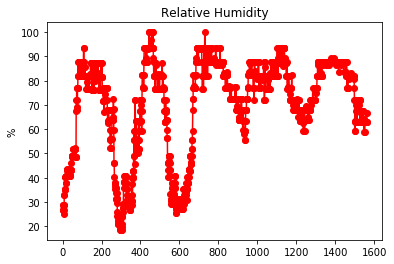

In [14]:
## create a simple line plot using matplotlib

x=np.arange(len(df.index))
## Use the following syntax to access data via variable/column names
y=df.relative_humidity_set_1
## Use matplotlib's plot_date function when your x-axis is a datetime series
plt.plot(x, y, color='r', marker='o')
# add label to y-axis
plt.ylabel('%')
plt.title('Relative Humidity')
plt.show()

In [13]:
# Converting the index as date (need to do this to utilize functionality of resample)
df.index = pd.to_datetime(df.Date_Time)
## resamples data to daily
df_daily = df.resample('D', label='right').mean()
df_daily

,altimeter_set_1,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,sea_level_pressure_set_1,weather_cond_code_set_1,cloud_layer_3_code_set_1,...,peak_wind_speed_set_1,ceiling_set_1,pressure_change_code_set_1,air_temp_high_24_hour_set_1,air_temp_low_24_hour_set_1,peak_wind_direction_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,pressure_set_1d,sea_level_pressure_set_1d
Date_Time,,,,,,,,,,,,,,,,,,,,,
2019-03-31 00:00:00+00:00,101633.286154,21.976923,5.600000,29.487692,4.708462,260.000000,NaN,101620.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.245385,NaN,101597.373846,101633.221538
2019-04-01 00:00:00+00:00,101650.220321,16.553205,7.929167,62.390545,1.864744,109.131833,NaN,101640.416667,NaN,NaN,...,NaN,NaN,NaN,22.8,6.7,NaN,8.024071,NaN,101614.299487,101650.837724
2019-04-02 00:00:00+00:00,101429.562212,17.801282,7.854167,57.979423,1.533141,114.501608,NaN,101418.750000,NaN,NaN,...,NaN,8077.200000,NaN,26.7,8.9,NaN,7.904551,NaN,101393.719487,101430.017692
2019-04-03 00:00:00+00:00,101273.115209,15.384887,11.183333,77.275080,2.626688,132.677419,8.235,101266.250000,31.0,NaN,...,NaN,3657.600000,NaN,24.4,10.0,NaN,11.048232,NaN,101237.328457,101273.868071
2019-04-04 00:00:00+00:00,101591.609618,13.824204,10.219231,78.878344,2.507038,147.731629,9.260,101592.500000,NaN,NaN,...,NaN,1066.800000,NaN,18.3,11.1,NaN,10.086465,8.15,101555.708917,101592.563503
2019-04-05 00:00:00+00:00,101815.719169,14.248505,10.654167,79.557741,2.382757,192.358804,NaN,101807.826087,NaN,553.666667,...,NaN,1181.395349,NaN,18.3,7.8,NaN,10.620133,NaN,101779.740332,101816.618472


Plot the resampled data using matplotlib's [plot_date function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot_date.html).

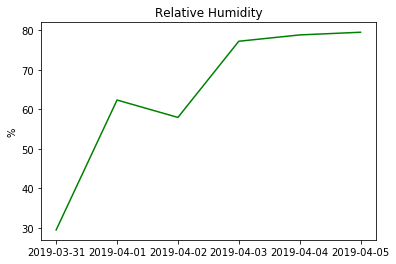

In [11]:
## create a simple line plot using matplotlib

x=df_daily.index
## Use the following syntax to access data via variable/column names
y=df_daily.relative_humidity_set_1
## Use matplotlib's plot_date function when your x-axis is a datetime series
plt.plot_date(x, y, 'g')
plt.ylabel('%')
plt.title('Relative Humidity')
plt.show()

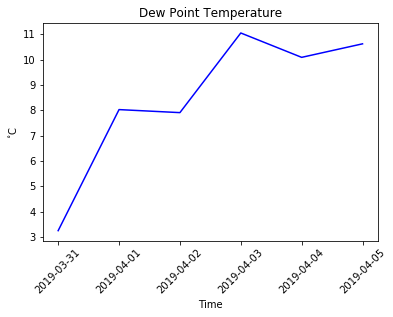

In [5]:
## Use the simple line plot function found in modules/plotter.py
simple_line_plot(df=df_daily,varname='dew_point_temperature_set_1d', title='Dew Point Temperature',
                 x_label='Time', y_label='$^{\circ}$C')